## Data Science Team Project
**Authors:** Kerry Effinger and Katie Zopff  
**Version:** 1.0

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline


In [21]:
testa = pd.read_csv('Testing_set_advance.csv')
traina = pd.read_csv('Training_set_advance.csv')

In [12]:
testi = pd.read_csv('Testing_set_intermediate.csv')

In [85]:
traini = pd.read_csv('Training_set_intermediate.csv')

/Users/kerryeffinger/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: 'module' object is not callable

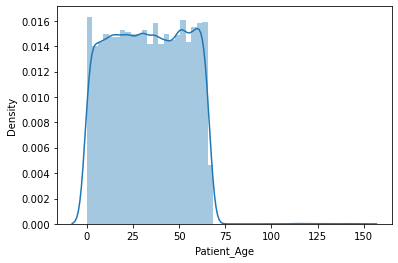

In [87]:
sns.distplot(traini['Patient_Age'])
fig = plt.figure()

## Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

In [57]:
df = traini[['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']]

In [58]:
X = np.array(df[['Patient_Age', 'Patient_Body_Mass_Index', 'Number_of_prev_cond']])
y = np.array(traini['Survived_1_year'])

### Code to split data 60/20/20 

In [59]:
x_train, x_test_prime, y_train, y_test_prime = train_test_split(X, y, test_size=.40, random_state=42)

In [60]:
x_validate, x_test, y_validate, y_test = train_test_split(x_test_prime, y_test_prime, test_size=.50, random_state=42)

In [61]:
print(len(x_train), len(x_validate), len(x_test))

13858 4619 4620


### Code to split 80/10/10

In [77]:
x_train2, x_test_prime2, y_train2, y_test_prime2 = train_test_split(X, y, test_size=.20, random_state=42)

In [78]:
x_validate2, x_test2, y_validate2, y_test2 = train_test_split(x_test_prime2, y_test_prime2, test_size=.50, random_state=42)

In [79]:
print(len(x_train2), len(x_validate2), len(x_test2))

18477 2310 2310


In [50]:
prev_cond = traini['Number_of_prev_cond'].groupby(traini['Number_of_prev_cond']).count()

<AxesSubplot:xlabel='Number_of_prev_cond'>

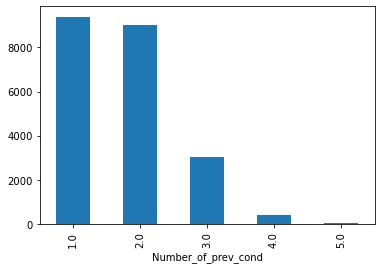

In [51]:
prev_cond.plot.bar()

Replacing the null values with 0 or 1

In [54]:
traini['Number_of_prev_cond'] = traini['Number_of_prev_cond'].fillna(1.0)
traini['A'] = traini['A'].fillna(1.0)
traini['B'] = traini['B'].fillna(0.0)
traini['C'] = traini['C'].fillna(0.0)
traini['D'] = traini['D'].fillna(0.0)
traini['E'] = traini['E'].fillna(0.0)
traini['F'] = traini['F'].fillna(0.0)
traini['Z'] = traini['Z'].fillna(0.0)

### Creating decision tree model

In [33]:
from sklearn import tree

In [39]:
treemodel = tree.DecisionTreeClassifier()

In [62]:
treemodel = treemodel.fit(x_train,y_train)

In [65]:
y_validate_pred = treemodel.predict(x_validate)

In [66]:
y_validate_pred

array([1, 0, 1, ..., 0, 1, 1])

In [68]:
from sklearn.datasets import load_iris
from sklearn import tree
A, b = load_iris(return_X_y=True)
tree2 = tree.DecisionTreeClassifier()
tree2 = treemodel.fit(A, b)

In [70]:
#tree.plot_tree(treemodel)

In [80]:
treemodel2 = treemodel.fit(x_train2,y_train2)

In [81]:
y_validate_pred2 = treemodel.predict(x_validate2)

In [82]:
y_validate_pred2

array([1, 0, 1, ..., 0, 0, 1])

### Measuring Performance
accuracy is split 60/20/20 and accuracy2 is split 80/10/10  
will need to do accuracy, sensitivity(same as recall), F measure (F1?)

In [72]:
from sklearn import metrics

In [75]:
accuracy = metrics.accuracy_score(y_validate,y_validate_pred)
precision = metrics.precision_score(y_validate,y_validate_pred)

In [76]:
print(accuracy, precision)

0.6523056938731328 0.7464525765496639


In [83]:
accuracy2 = metrics.accuracy_score(y_validate2,y_validate_pred2)

In [84]:
print(accuracy2)

0.6398268398268399
